# NAJIYA MUJEEB

# E-MAIL SPAM DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Understanding the dataset

In [2]:
df=pd.read_csv("spam.csv",encoding=('ISO-8859-1'),low_memory=False)

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.rename(columns={'v1':'ham or spam'},inplace=True)


In [10]:
df.rename(columns={'v2':'mail'},inplace=True)

Here the dataset consists of 5572 rows and 5 columns. We renamed the column 'v1' as 'ham or spam' and 'v2' as 'mail'

# Data Cleaning

In [11]:
df.isnull().sum()

ham or spam       0
mail              0
Unnamed: 2     5522
Unnamed: 3     5560
Unnamed: 4     5566
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [14]:
df=df.drop_duplicates()

In [15]:
df

,ham or spam,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


The dataset consists of many null values.Columns'Unnamed:2','Unnamed:3','Unnamed:4' have more null values. So we are dropping it. Also duplicate values also get dropped

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb=LabelEncoder()

In [18]:
df['ham or spam']=lb.fit_transform(df['ham or spam'])
df

,ham or spam,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Our target column is 'ham or spam'. We encoded it as 0 for 'ham' and 1 for 'spam'.

# Data Visualization 

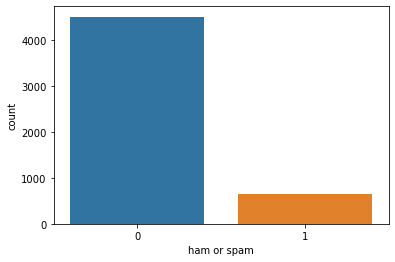

In [19]:

sns.countplot(data=df,x='ham or spam')
plt.show()

# Model Building

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df['mail']
y=df['ham or spam']

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)

Here, 70% of the data is used for training the data and 30% is used for testing the data.

# Vectorizing

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf=TfidfVectorizer()

In [25]:
X_train_vec = tfidf.fit_transform(X_train.values)
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model=MultinomialNB()

In [28]:
model.fit(X_train_vec,Y_train)

MultinomialNB()

In [29]:
X_test_count = tfidf.transform(X_test)

In [30]:
model.score(X_test_count,Y_test)

0.9484203739522888

The model I selected is Multinomial Naive Bayes Classifier. It obtained 94% score.